# Introduction

* A **Circular Singly Linked list** is same as **singly-linked list**, with just one difference.
* It is that the last node of the linked list (**TAIL**) points towards the first node, forming a circular cycle.
* No node in the circular linked list points towards `NULL`.
* If we start from any node, then after traversal, we will again come back to the same node.
* Both the last node (**TAIL**) of the linked list and the **HEAD** pointer point towards the start node of the linked list.  
* Since the last node (**TAIL**) and the first node of the circular linked list are connected, the traversal in this linked list will go on forever until it is broken.

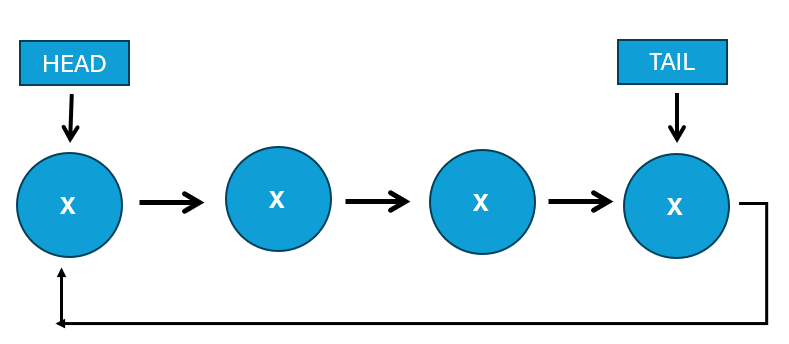

# Circular Singly Linked List implementation

In [45]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None
    
    def __str__(self):
        return str(self.data)

class CSLinkedList:
    # Creation of an Empty Circular Singly Linked List with one Node
    # def __init__(self, value):
    #     new_node = Node(value)
    #     new_node.next = new_node
    #     self.head = new_node
    #     self.tail = new_node
    #     self.length = 1

    # # Creation of a Circular Singly Linked List with zero node
    def __init__(self):
        # Empty Circular Singly Linked List
        self.head = None
        self.tail = None
        self.length = 0

    # Print string representation of a Circular Singly Linked List
    def __str__(self):
        temp_node = self.head
        result = ''
        # Circular Singly Linked List traversal
        while temp_node is not None:
            result += str(temp_node.data)
            temp_node = temp_node.next
            if temp_node == self.head:  # Stop condition for circular sinlgy linked list
                break
            result += ' -> '
        return result

    # Insertion at the end of the Circular Singly Linked List
    def append(self, value):
        new_node = Node(value)
        # add node in an empty Circular Singly Linked list
        if self.length == 0:
            self.head = new_node
            self.tail = new_node
            new_node.next = self.head
        # insert at the end of the Circular Singly linked list
        else:
            self.tail.next = new_node
            self.tail = new_node
            new_node.next = self.head            
        self.length += 1

    # Insertion at the beginning of the Circular Singly linked list    
    def prepend(self, value):
        new_node = Node(value)
        # add node in an empty Circular Singly linked list
        if self.length == 0:
            self.head = new_node
            self.tail = new_node
            new_node.next = new_node
        # insert at the beginning of the Circular Singly linked list
        else:
            new_node.next = self.head
            self.head = new_node
            self.tail.next = new_node  # Pointing the tail's next to the new head
        self.length += 1

    # Insertion at a specified index of a Circular Singly linked list
    def insert(self, index, data):
        if index < 0 or index > self.length:  # Check for out of range
            print("Index out of range")
            return False
        
        new_node = Node(data)

        # add node in an empty Circular singly linked list
        if self.length == 0:  # if list is empty
            self.head = new_node
            self.tail = new_node
            new_node.next = self.head
        # insert at the beginning of a Circular singly linked list
        elif index == 0:
            new_node.next = self.head
            self.head = new_node
            self.tail.next = new_node  # Update tail's next for circularity
        # insert at the end of a Circular singly linked list
        elif index == self.length:
            self.tail.next = new_node
            new_node.next = self.head
            self.tail = new_node
        # insert at a specified index of a Circular Singly linked list
        else:
            temp_node = self.head
            for _ in range(index-1):
                temp_node = temp_node.next
            new_node.next = temp_node.next
            temp_node.next = new_node
            
        self.length += 1
        return True

    # Circular Singly Linked List traversal
    def traverse(self):
        if not self.head:  # If the list is empty
            print("Circular Linked List is Empty!!")
            return -1
        current = self.head
        while current is not None:
            print(current.data)
            current = current.next
            if current == self.head:  # Stop condition for circular list
                break
        return 0

    # Search node in a Circular Singly linked list
    def search(self, target):
        if not self.head:  # If the list is empty
            print("Circular Linked List is Empty!!")
            return -1
        index = 0
        current = self.head
        while current is not None:
            if current.data == target:
                return index
            current = current.next
            index += 1
            if current == self.head:  # Stop condition for circular single-linked list
                break
        return -1

    # Get node of a Circular Singly linked list
    def get(self, index):
        if index == -1:
            return self.tail
        elif index < -1 or index >= self.length:
            print("Invalid Index!!!")
            return None
        current = self.head
        for _ in range(index):
            current = current.next
        return current

    # Set value of a node of Circular Singly linked list
    def set_value(self, index, data):
        temp = self.get(index)
        if temp:
            temp.data = data
            return True
        return False

    # Pop first node of a Circular Singly linked list
    def pop_first(self):
        if self.length == 0:
            return None
        popped_node = self.head
        
        if self.length == 1:
            self.head = None
            self.tail = None
        else:
            self.head = self.head.next
            self.tail.next = self.head  # Update the tail's next pointer to point to the new head
            popped_node.next = None
        
        self.length -= 1
        return popped_node
    
    # Pop last node of a Circualr Singly linked list
    def pop(self):
        if self.length == 0:
            return None
        popped_node = self.tail
        if self.length == 1:
            self.head = None
            self.tail = None
        else:
            temp = self.head
            while temp.next != self.tail:  # Traverse until the second last node
                temp = temp.next
            temp.next = self.head  # Pointing the second last node's next to the head
            self.tail = temp  # Updating the tail to be the second last node
        popped_node.next = None
        self.length -= 1
        return popped_node
    

    # Remove any middle-indexed node of a Circular Singly linked list
    def remove(self, index):
        if index < -1 or index >= self.length:
            return None
        if index == 0:
            return self.pop_first()
        if index == -1 or index == self.length-1:
            return self.pop()
        prev_node = self.get(index-1)
        popped_node = prev_node.next
        prev_node.next = popped_node.next
        popped_node.next = None
        self.length -= 1
        return popped_node
    
    # Delete all nodes of a Circular Singly linked list
    def delete_all(self):
        if self.length == 0:
            return  # If the list is empty, just return
        self.tail.next = None  # Breaking the circular single-linked list
        self.head = None
        self.tail = None
        self.length = 0



linked_list = CSLinkedList()
print(linked_list.head)
print(linked_list.length)

None
0


# Creation of Circular Singly Linked List

**Creation of an Empty Circular Singly Linked List with zero nodes**

```python
class CSLinkedList:

    # Creation of a Singly Circular Linked List with zero nodes
    def __init__(self):
        # Empty Circular Singly Linked List
        self.head = None
        self.tail = None
        self.length = 0
```

**Creation of a Circular Singly Linked List with a single node**

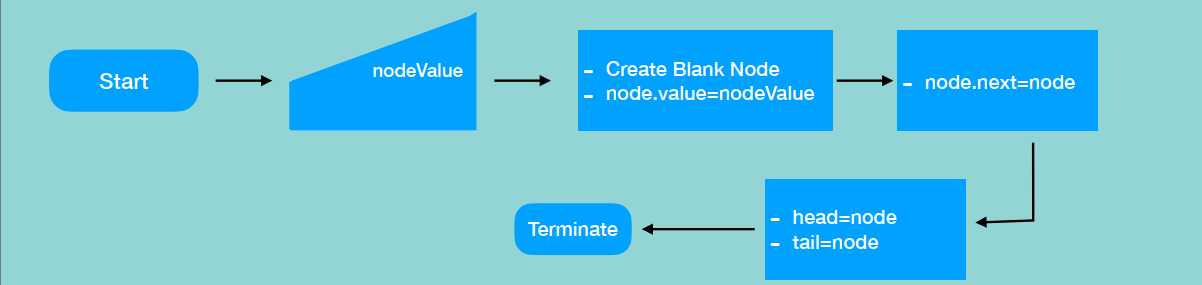

```python
class CSLinkedList:
    # Creation of a Circular Singly Linked List with a single node
    def __init__(self, value):
        new_node = Node(value)
        new_node.next = new_node
        self.head = new_node
        self.tail = new_node
        self.length = 1

```

# Insertion in Circular Singly Linked List

1. Insert a new node at the end of the circular singly linked list - `append()` operation
2. Insert a new node at the beginning of the circular singly linked list - `prepend()` operation
3. Insert at a specified index of a circular singly linked list - `insert()` operation

## Insert a new node at the end of the circular singly linked list - `append()` operation

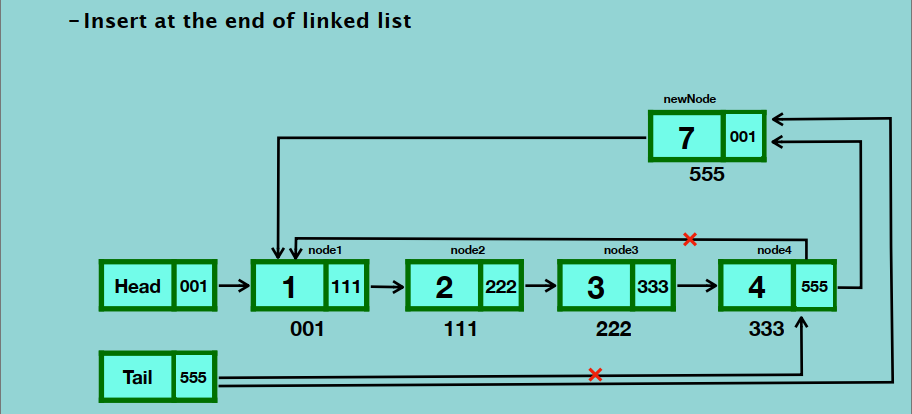

**Case 1: append in an empty Circular Linked List**
* Create a **new_node**.
* Set `head` to point to the **new_node**.
* Set `tail` to point to the **new_node**.
* Set `next` pointer of the **new_node** to point to itself (the node pointed by `head`).

```
new_node = Node(3)
head = new_node
tail = new_node
new_node.next = head
```

**Case 2: append in a Circular Linked List having one or more nodes**

* Create a **new_node**.
* Set `next` pointer of the **last_node** pointed by `tail` to point to the **new_node**.
* Set `tail` to point to the **new_node**.
* Set `next` pointer of the **new_node** point to the **first_node** pointed by `head`.

```
new_node = Node(3)
last_node.next = new_node
tail = new_node
new_node.next = head
```

**Implementation**

```python
# Insertion at the end of the Circular Singly Linked List
def append(self, value):
    new_node = Node(value)
    # add node in an empty Circular Singly Linked list
    if self.length == 0:
        self.head = new_node
        self.tail = new_node
        new_node.next = self.head
    # insert at the end of the Circular Singly linked list
    else:
        self.tail.next = new_node
        self.tail = new_node
        new_node.next = self.head

    self.length += 1
```

In [8]:
# Create Circular Singly Linked List: 10 > 20 > 30 > 40 
circular_linked_list = CSLinkedList()
circular_linked_list.append(10)
circular_linked_list.append(20)
circular_linked_list.append(30)
circular_linked_list.append(40)

print("Circular Linked List: ", circular_linked_list)

# Insert a new node at the end of the linked list with a node having a value of 50
circular_linked_list.append(50)

print("Last node value: ", circular_linked_list.tail.data)
print("Length of the linked list: ", circular_linked_list.length)
print("Linked List after append: ", circular_linked_list)

Circular Linked List:  10 -> 20 -> 30 -> 40
Last node value:  50
Length of the linked list:  5
Linked List after append:  10 -> 20 -> 30 -> 40 -> 50


## Insert a new node at the beginning of the circular singly linked list - `prepend()` operation

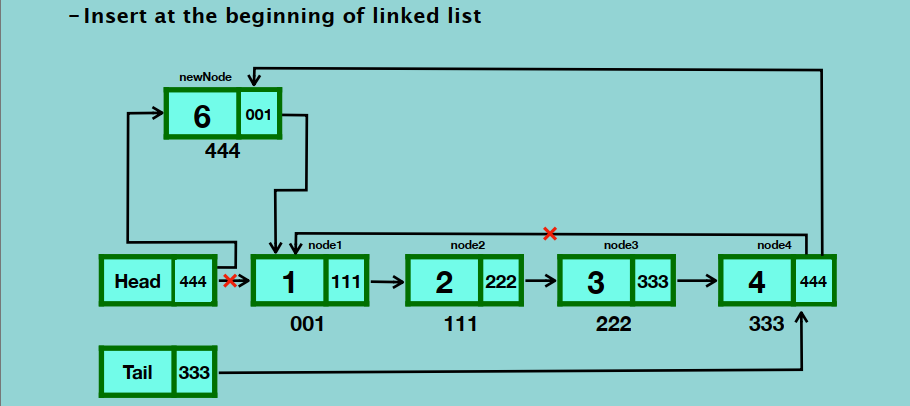

**Case 1: prepend in an empty Circular Linked List**
* Create a **new_node**.
* Set `head` to point to the **new_node**.
* Set `tail` to point to the **new_node**.
* Set `next` pointer of the **new_node** to point to itself (the node pointed by `head`).

```
new_node = Node(3)
head = new_node
tail = new_node
new_node.next = head
```

**Case 2: prepend in a Circular Linked List having one or more nodes**

* Create a **new_node**.
* Set the `next` pointer of the **new_node** to the **first node** (pointed by `head`) of the linked list.
* Set `head` pointer to point to the **new_node**.
* Set the `next` pointer of the **last_node** pointed by `tail` to point to the **new_node**.

```
new_node = Node(0)
new_node.next = head
head = new_node
tail.next = new_node
```

**Implementation**

```python
# Insertion at the beginning of the Circular Singly linked list    
def prepend(self, value):
    new_node = Node(value)
    # add node in an empty Circular Singly linked list
    if self.length == 0:
        self.head = new_node
        self.tail = new_node
        new_node.next = new_node
    # insert at the beginning of the Circular Singly linked list
    else:
        new_node.next = self.head
        self.head = new_node
        self.tail.next = new_node  # Pointing the tail's next to the new head
    self.length += 1
```

In [17]:
# Create Circular Linked List: 10 > 20 > 30 > 40 
circular_linked_list = CSLinkedList()
circular_linked_list.prepend(50)
circular_linked_list.prepend(40)
circular_linked_list.prepend(30)
circular_linked_list.prepend(20)

print("Circular Linked List: ", circular_linked_list)

# Insert a new node at the beginning of the linked list with a node having a value of 50
circular_linked_list.prepend(10)

print("First node value: ", circular_linked_list.head.data)
print("Length of the linked list: ", circular_linked_list.length)
print("Linked List after prepend: ", circular_linked_list)

Circular Linked List:  20 -> 30 -> 40 -> 50
First node value:  10
Length of the linked list:  5
Linked List after prepend:  10 -> 20 -> 30 -> 40 -> 50


## Insert a new node in the middle of the circular singly linked list - `insert()` operation

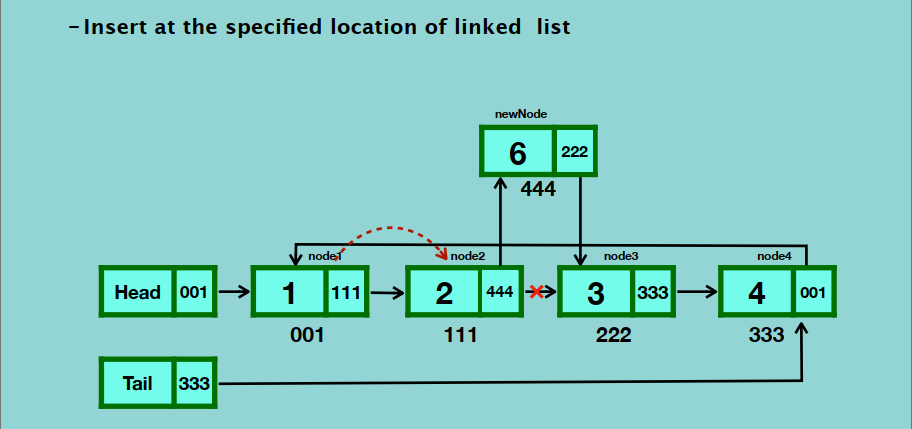

**Case 1: Insert in an empty Circular Linked List**
* Create a **new_node**.
* Set `head` to point to the **new_node**.
* Set `tail` to point to the **new_node**.
* Set the `next` pointer of the **new_node** to point to itself (the node pointed by `head`).

```
new_node = Node(3)
head = new_node
tail = new_node
new_node.next = head
```

**Case 2: Insert at the beginning of a Circular Linked List having one or more nodes**

* Create a **new_node**.
* Set the `next` pointer of the **new_node** to the **first node** (pointed by `head`) of the linked list.
* Set `head` pointer to point to the **new_node**.
* Set the `next` pointer of the **last_node** pointed by `tail` to point to the **new_node**.

```
new_node = Node(0)
new_node.next = head
head = new_node
tail.next = new_node
```


**Case 3: Insert at the end of a Circular Linked List having one or more nodes**

* Create a **new_node**.
* Set `next` pointer of the **last_node** pointed by `tail` to point to the **new_node**.
* Set `tail` to point to the **new_node**.
* Set `next` pointer of the **new_node** point to the **first_node** pointed by `head`.

```
new_node = Node(3)
last_node.next = new_node
tail = new_node
new_node.next = head
```

**Case 4: Insert at a specific index of a Circular Linked List having one or more nodes**
* Create a **new_node**.
* Traverse to the **previous node** pointing to the **index_node** where the **new_node** will be inserted.
* Set **temp_node** pointer to point the**previous node** of the **index_node**.
* Set the `next` pointer of the **new_node** to point to the node pointed by the `temp_node.next`.
* Now, set the `next` pointer of the **temp_node** to point to the **new_node**.

```
new_node = Node(3)
temp_node = head

for _ in range(index-1):
    temp_node = temp_node.next

new_node.next = temp_node.next
temp_node.next = new_node
```



**Implementation**

```python
# Insertion in the middle of the Circular Singly linked list
def insert(self, index, value):
    if index < 0 or index > self.length:  # Check for out of range
        print("Index out of range")
        return False

    new_node = Node(value)

    # add node in an empty Circular singly linked list
    if self.length == 0:  # if list is empty
        self.head = new_node
        self.tail = new_node
        new_node.next = self.head
    # insert at the beginning
    elif index == 0:
        new_node.next = self.head
        self.head = new_node
        self.tail.next = new_node  # Update tail's next for circularity
    # insert at the end
    elif index == self.length:
        self.tail.next = new_node
        new_node.next = self.head
        self.tail = new_node
    # insert in the middle
    else:
        temp_node = self.head
        # Traverse to the previous node of the index node
        for _ in range(index - 1):
            temp_node = temp_node.next
        new_node.next = temp_node.next
        temp_node.next = new_node

    self.length += 1
    return True
```

In [32]:
# Create Circular Linked List: 10 > 20 > 30 > 40 
circular_linked_list = CSLinkedList()
circular_linked_list.append(10)
circular_linked_list.append(20)
circular_linked_list.append(30)
circular_linked_list.append(40)

print("Circular Linked List before insertions: ", circular_linked_list)

# Insert a new node at a specified index in a Circular linked list
print("Insert at the beginning of the Circular Linked List: ", str(circular_linked_list.insert(0, 50)))
print("Insert in the middle of the Circular Linked List: ", str(circular_linked_list.insert(2, 60)))
print("Insert at the end of the Circular Linked List: ", str(circular_linked_list.insert(linked_list.length, 70)))

print("Length of the Circular Linked List: ", circular_linked_list.length)
print("Circular Linked List after insertions: ", circular_linked_list)

print() 

empty_circular_linked_list = CSLinkedList()
print("Insert at Invalid Index of a Circular Linked List: ", str(empty_circular_linked_list.insert(1, 100)))
print("Insert in an empty Circular Linked List: ", str(empty_circular_linked_list.insert(0, 100)))
print("Circular Linked List after insertions: ", empty_circular_linked_list)

Circular Linked List before insertions:  10 -> 20 -> 30 -> 40
Insert at the beginning of the Circular Linked List:  True
Insert in the middle of the Circular Linked List:  True
Insert at the end of the Circular Linked List:  True
Length of the Circular Linked List:  7
Circular Linked List after insertions:  70 -> 50 -> 10 -> 60 -> 20 -> 30 -> 40

Index out of range
Insert at Invalid Index of a Circular Linked List:  False
Insert in an empty Circular Linked List:  True
Circular Linked List after insertions:  100


# Circular Singly Linked List Insertion algorithm

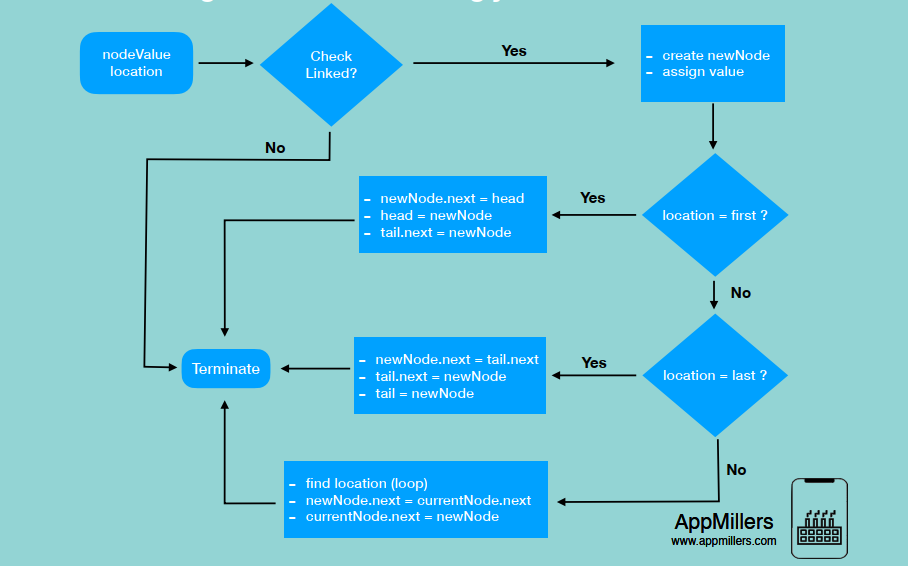

# Traversal of Circular Singly Linked List

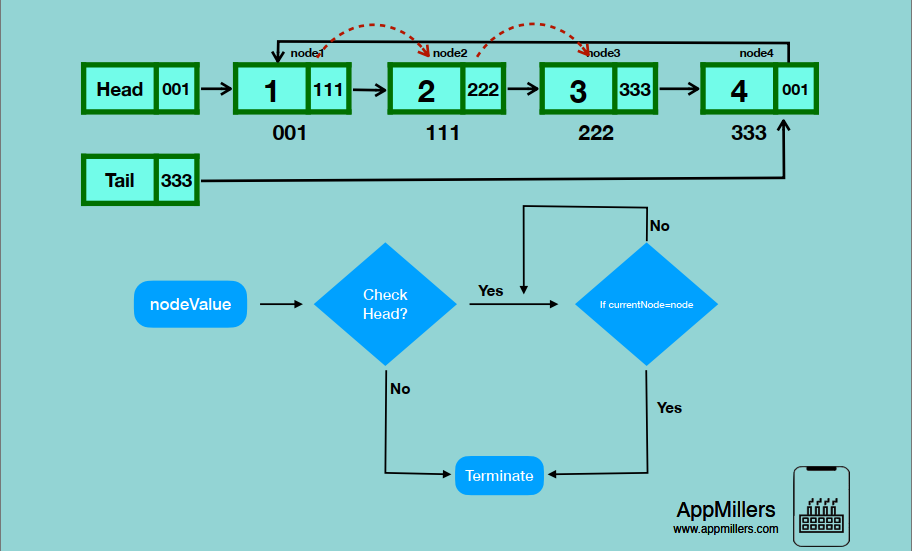

**Implementation**

```python
# Circular Singly Linked List traversal
def traverse(self):
    if not self.head:  # If the list is empty
        print("Circular Linked List is Empty!!")
        return -1
    current = self.head
    while current is not None:
        print(current.data)
        current = current.next
        if current == self.head:  # Stop condition for circular list
            break
    return 0
```

In [43]:
# Create Circular Singly Linked List: 10 > 20 > 30 > 40 
circular_linked_list = CSLinkedList()

print("Empty Circular Linked List: ", circular_linked_list)
print("Traversing Circular Linked List Status: ", circular_linked_list.traverse())
print()

circular_linked_list.append(10)
circular_linked_list.append(20)
circular_linked_list.append(30)
circular_linked_list.append(40)

print("Circular Linked List after adding nodes: ", circular_linked_list)
print("Traversing Circular Linked List Status: ", circular_linked_list.traverse())

Empty Circular Linked List:  
Circular Linked List is Empty!!
Traversing Circular Linked List Status:  -1

Circular Linked List after adding nodes:  10 -> 20 -> 30 -> 40
10
20
30
40
Traversing Circular Linked List Status:  0


# Searching in Circular Singly Linked List

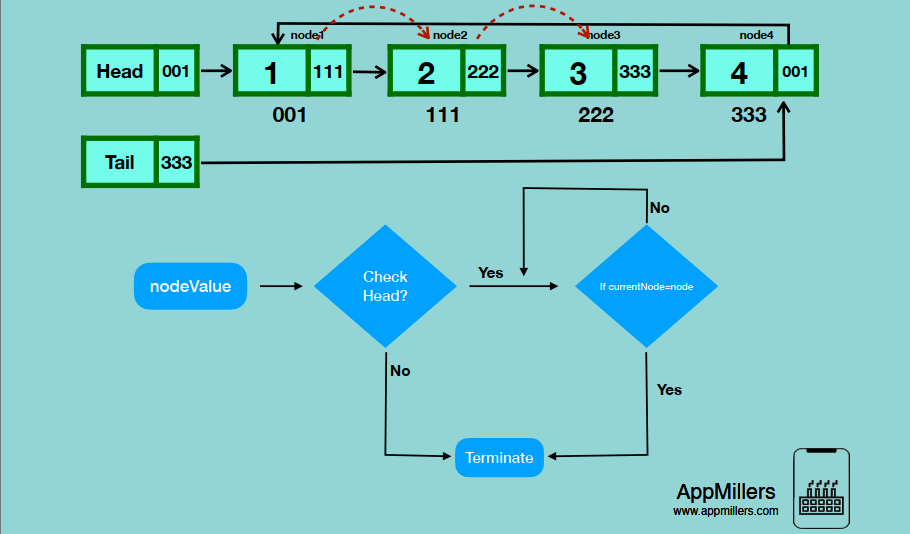

**Implementation**:

```python
# Search node in a Circular Singly linked list
def search(self, target):
    if not self.head:  # If the list is empty
        print("Circular Linked List is Empty!!")
        return -1
    index = 0
    current = self.head
    while current is not None:
        if current.data == target:
            return index
        current = current.next
        index += 1
        if current == self.head:  # Stop condition for circular single-linked list
            break
    return -1
```

In [44]:
# Create Circular Singly Linked List: 10 > 20 > 30 > 40 
circular_linked_list = CSLinkedList()

print("Empty Circular Linked List: ", circular_linked_list)
print("Element found at index: ", circular_linked_list.search(30))
print()

circular_linked_list.append(10)
circular_linked_list.append(20)
circular_linked_list.append(30)
circular_linked_list.append(40)

print("Circular Linked List after adding nodes: ", circular_linked_list)

print("Element found at index: ", circular_linked_list.search(30))
print("Element found at index: ", circular_linked_list.search(50))

Empty Circular Linked List:  
Circular Linked List is Empty!!
Element found at index:  -1

Circular Linked List after adding nodes:  10 -> 20 -> 30 -> 40
Element found at index:  2
Element found at index:  -1


# `get()` method - to get node of a singly linked list

**Implementation**

```python
# Get node of a Circular Singly linked list
def get(self, index):
    if index == -1:
        return self.tail
    elif index < -1 or index >= self.length:
        print("Invalid Index!!!")
        return None
    current = self.head
    for _ in range(index):
        current = current.next
    return current
```

In [46]:
# Create Circular Singly Linked List: 10 > 20 > 30 > 40 
circular_linked_list = CSLinkedList()
circular_linked_list.append(10)
circular_linked_list.append(20)
circular_linked_list.append(30)
circular_linked_list.append(40)

print("Circular Singly Linked List: ", circular_linked_list)
print("Last Node value: ", circular_linked_list.get(-1).data)
print("Index 2 Node: ", circular_linked_list.get(2).data)

Circular Singly Linked List:  10 -> 20 -> 30 -> 40
Last Node value:  40
Index 2 Node:  30


# `set_value()` method - to update a node value of singly linked list

**Implementation**

```python
# Set value of a node of Circular Singly linked list
def set_value(self, index, data):
    temp = self.get(index)
    if temp:
        temp.data = data
        return True
    return False
```

In [49]:
# Create Circular Singly Linked List: 10 > 20 > 30 > 40 
circular_linked_list = CSLinkedList()
circular_linked_list.append(10)
circular_linked_list.append(20)
circular_linked_list.append(30)
circular_linked_list.append(40)

print("Circular Singly Linked List: ", circular_linked_list)

# set index 2 node value to 50
circular_linked_list.set_value(2, 50)

print("Circular Linked List: ", circular_linked_list)
print()

Circular Singly Linked List:  10 -> 20 -> 30 -> 40
Circular Linked List:  10 -> 20 -> 50 -> 40

